In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

In [3]:
df=pd.read_csv('/content/Combined Data.csv',index_col=0)
df.head()

statement   status
0                                         oh my gosh  Anxiety
1  trouble sleeping, confused mind, restless hear...  Anxiety
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3  I've shifted my focus to something else but I'...  Anxiety
4  I'm restless and restless, it's been a month n...  Anxiety

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53043 entries, 0 to 53042
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  52681 non-null  object
 1   status     53043 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [5]:
df.describe()

statement  status
count               52681   53043
unique              51073       7
top     what do you mean?  Normal
freq                   22   16351

In [6]:
df.isnull().sum()

statement    362
status         0
dtype: int64

##Handling Missing Values

In [7]:
df.dropna(inplace=True)
print(df.isnull().sum())

statement    0
status       0
dtype: int64


In [8]:
df['status'].unique()

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

In [9]:
sentiments=df['status'].value_counts()
sentiments

status
Normal                  16343
Depression              15404
Suicidal                10652
Anxiety                  3841
Bipolar                  2777
Stress                   2587
Personality disorder     1077
Name: count, dtype: int64

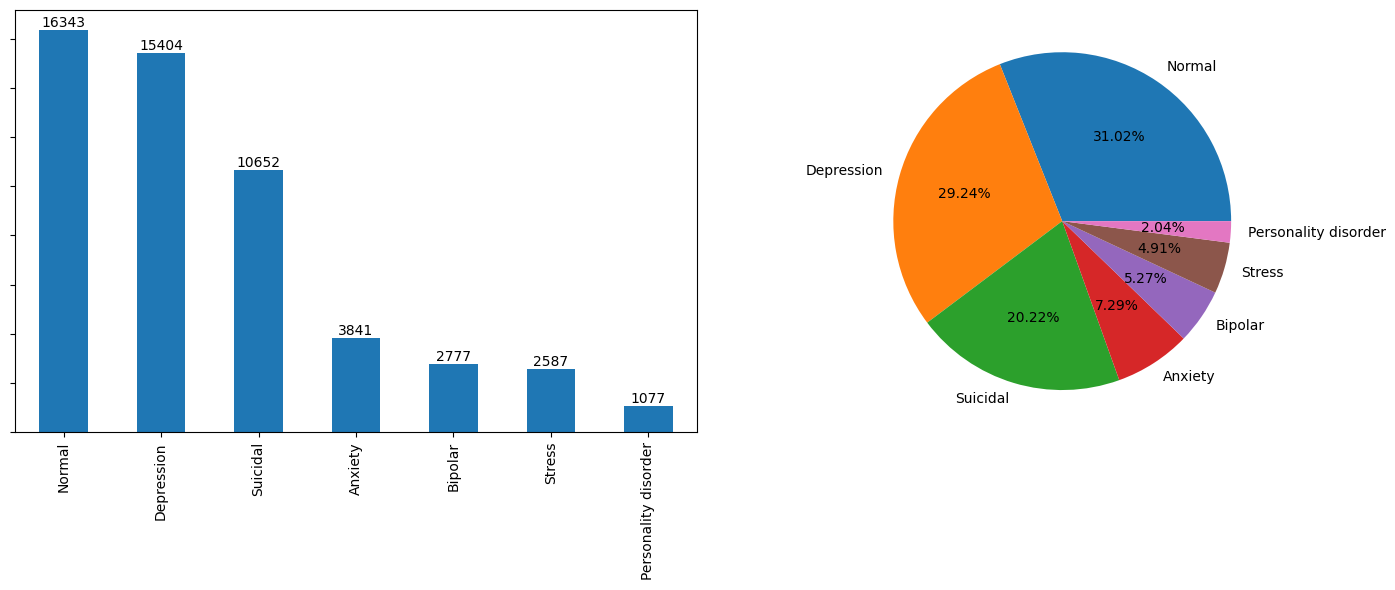

In [10]:
count = df["status"].value_counts()
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))
index = 0
count.plot(kind="bar", ax=axes[index])
for container in axes[index].containers:
    axes[index].bar_label(container)
axes[index].set_yticklabels(())
axes[index].set_ylabel("")
axes[index].set_xlabel("")
index += 1
count.plot(kind="pie", ax=axes[index], autopct="%0.2f%%")
axes[index].set_ylabel("")
axes[index].set_xlabel("")

plt.tight_layout()
plt.show()

##we can see that 31% of the texts are normal

In [11]:
df.shape

(52681, 2)

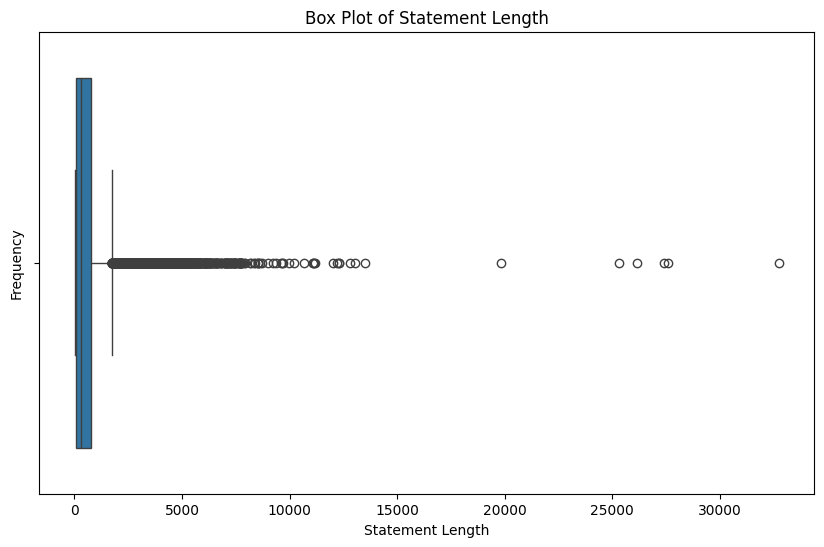

In [12]:
df['statement_length'] = df['statement'].apply(len)
Q1 = df['statement_length'].quantile(0.25)
Q3 = df['statement_length'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['statement_length'])
plt.title('Box Plot of Statement Length')
plt.xlabel('Statement Length')
plt.ylabel('Frequency')
plt.show()



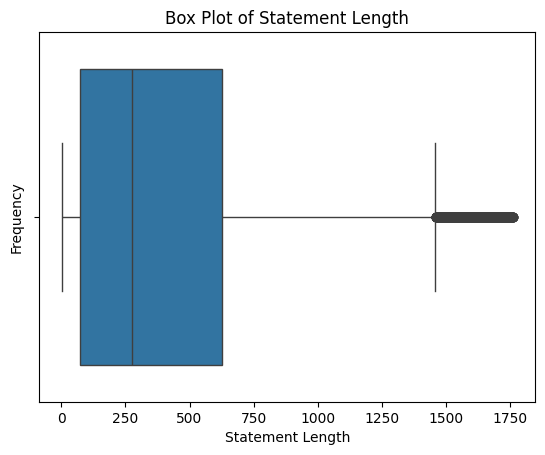

In [13]:
filtered_df = df[(df['statement_length'] >= lower_bound) & (df['statement_length'] <= upper_bound)]
sns.boxplot(x=filtered_df['statement_length'])
plt.title('Box Plot of Statement Length')
plt.xlabel('Statement Length')
plt.ylabel('Frequency')
plt.show()

In [14]:
# Check for duplicates where both 'statement' and 'status' are the same
duplicates = df[df.duplicated(subset=['statement', 'status'], keep=False)]
duplicates

statement   status  \
18     "No regrets or grudges/angry at things that ha...  Anxiety   
39     but my heart is still restless even though my ...  Anxiety   
97     "No regrets or grudges/angry at things that ha...  Anxiety   
132    I want to exhale the restlessness in my chest ...  Anxiety   
138    but my heart is still restless even though my ...  Anxiety   
...                                                  ...      ...   
53038  Nobody takes me seriously I’ve (24M) dealt wit...  Anxiety   
53039  selfishness  "I don't feel very good, it's lik...  Anxiety   
53040  Is there any way to sleep better? I can't slee...  Anxiety   
53041  Public speaking tips? Hi, all. I have to give ...  Anxiety   
53042  I have really bad door anxiety! It's not about...  Anxiety   

       statement_length  
18                  123  
39                   62  
97                  123  
132                  60  
138                  62  
...                 ...  
53038              1766  
53039              1012  
53040                85  
53041               401  
53042               417  

[2978 rows x 3 columns]

In [15]:
#keeping last occurence
df= df.drop_duplicates(subset=['statement', 'status'], keep='last')

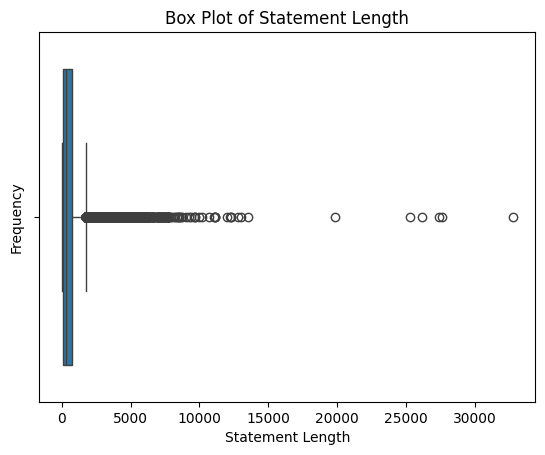

In [16]:
#lenght of stement
df['statement_length'] = df['statement'].apply(len)
#boxplot
sns.boxplot(x=df['statement_length'])
plt.title('Box Plot of Statement Length')
plt.xlabel('Statement Length')
plt.ylabel('Frequency')
plt.show()

## Data Cleaning

In [17]:
#normalizing case folding
def clean_text(text):
    text = text.str.lower()
#removing punctuation
    text = text.str.replace(r'[^\w\s]', '', regex=True)
#removing newlines
    text = text.str.replace("\n", '', regex=True)
#rewmoving digits
    text = text.str.replace('\d', '', regex=True)
#removing text inside square brackets
    text = text.str.replace(r'\[.*?\]', '', regex=True)
#removing urls
    text = text.str.replace(r'https?://\S+|www\.\S+', '', regex=True)
#removing html digits
    text = text.str.replace(r'<.*?>+', '', regex=True)
#removing words with digits
    text = text.str.replace(r'\w*\d\w*', '', regex=True)
    return text

In [18]:
df['statement']=clean_text(df['statement'])

In [19]:
df['statement']

0                                               oh my gosh
1        trouble sleeping confused mind restless heart ...
2        all wrong back off dear forward doubt stay in ...
3        ive shifted my focus to something else but im ...
4        im restless and restless its been a month now ...
                               ...                        
53038    nobody takes me seriously ive m dealt with dep...
53039    selfishness  i dont feel very good its like i ...
53040    is there any way to sleep better i cant sleep ...
53041    public speaking tips hi all i have to give a p...
53042    i have really bad door anxiety its not about b...
Name: statement, Length: 51093, dtype: object

In [20]:
df.count()

statement           51093
status              51093
statement_length    51093
dtype: int64

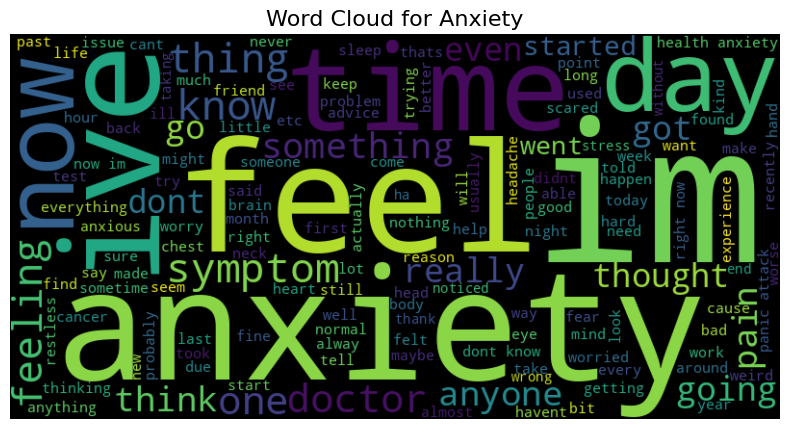

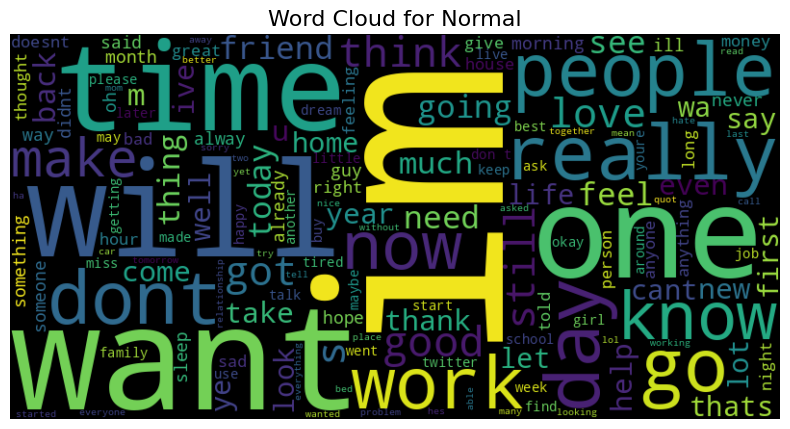

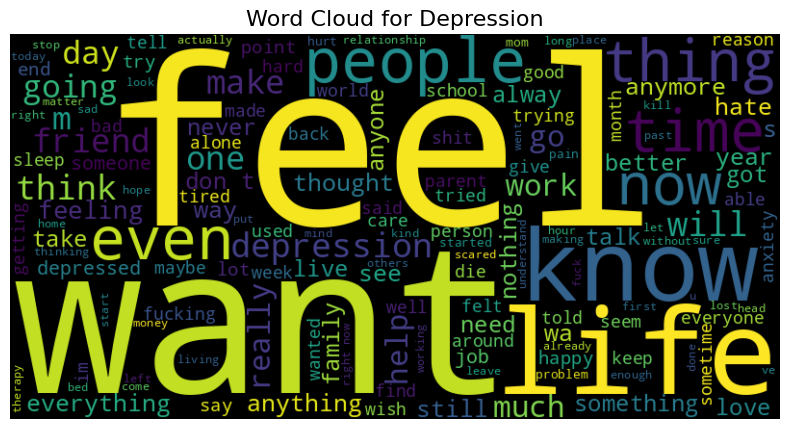

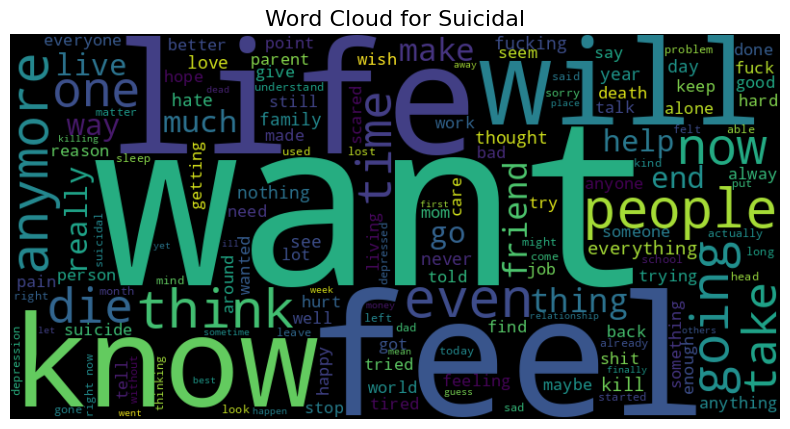

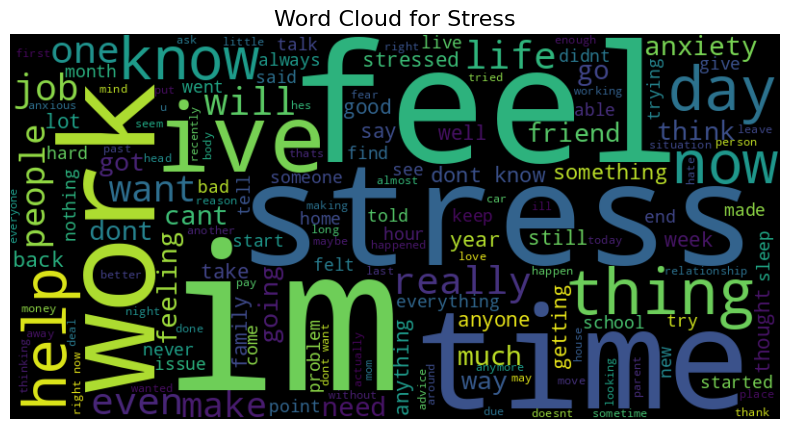

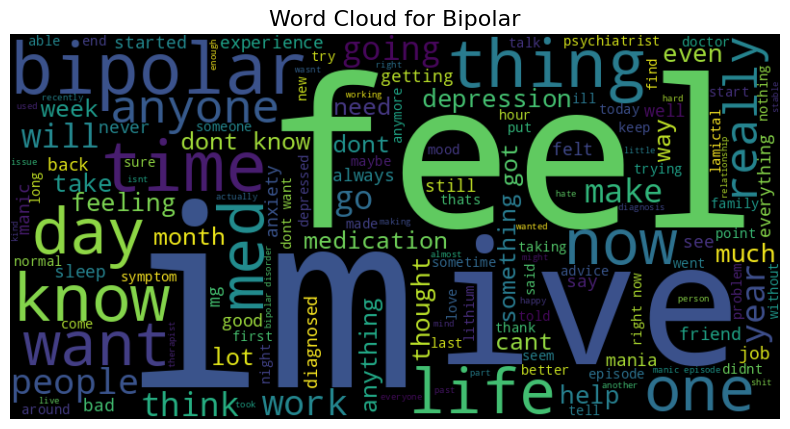

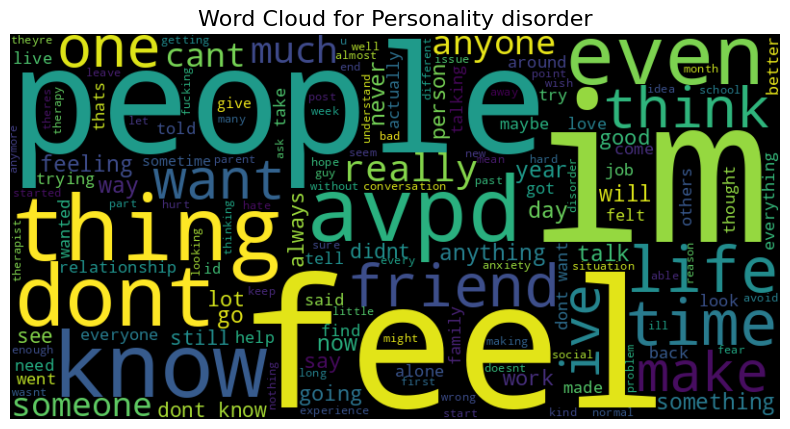

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def generate_word_cloud(text, title, max_words=200, colormap='viridis'):
    wordcloud = WordCloud(width=800, height=400, max_words=max_words).generate(text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()


unique_statuses = df['status'].unique()

for current_status in unique_statuses:
    combined_text = ' '.join(df[df['status'] == current_status]['statement'])
    generate_word_cloud(combined_text, title=f'Word Cloud for {current_status}', max_words=150, colormap='plasma')


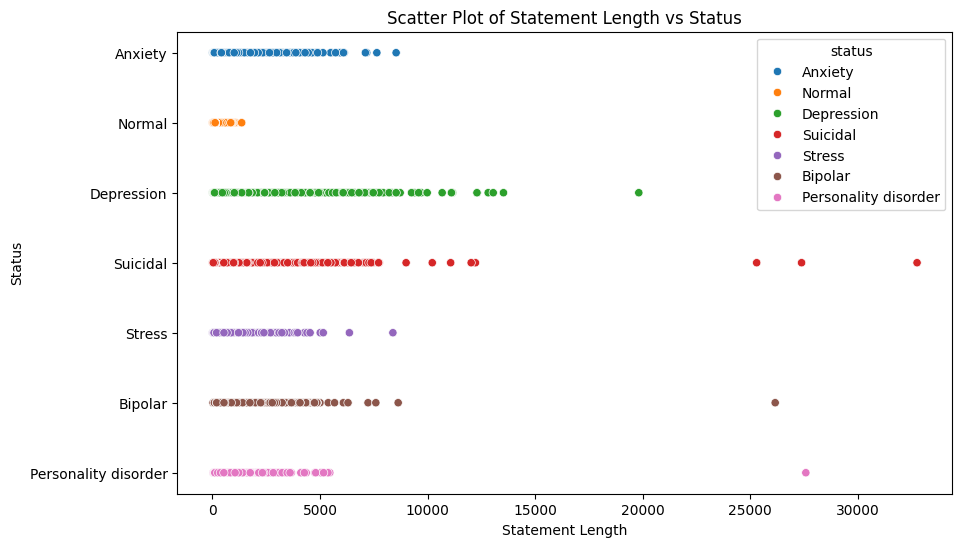

In [22]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='statement_length', y='status', data=df, hue='status')
plt.title('Scatter Plot of Statement Length vs Status')
plt.xlabel('Statement Length')
plt.ylabel('Status')
plt.show()

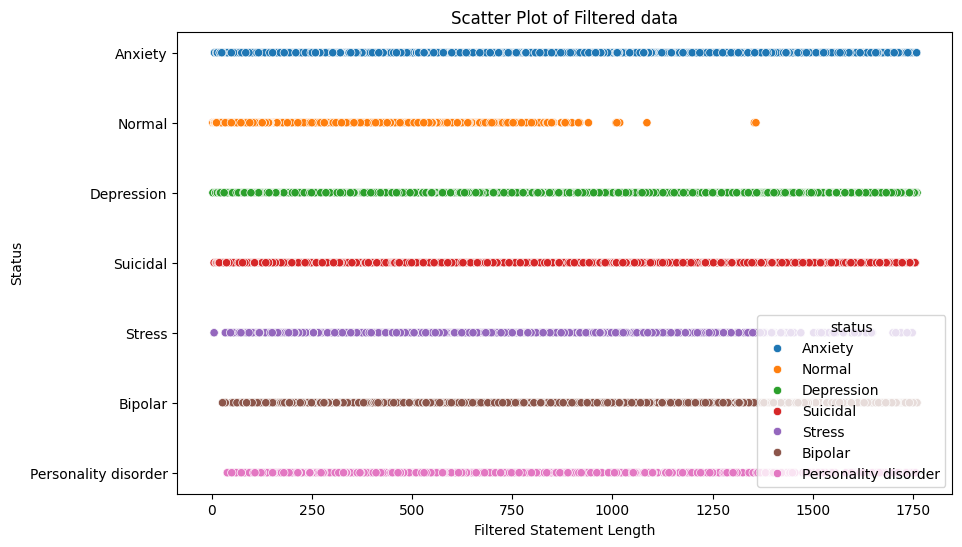

In [23]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='statement_length', y='status', data=filtered_df, hue='status')
plt.title('Scatter Plot of Filtered data')
plt.xlabel('Filtered Statement Length')
plt.ylabel('Status')
plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder

# Encode the status column to numerical values
label_encoder = LabelEncoder()
df['status_encoded'] = label_encoder.fit_transform(df['status'])

#correlation matrix
correlation_matrix = df[['statement_length', 'status_encoded']].corr()

#correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                  statement_length  status_encoded
statement_length          1.000000       -0.031968
status_encoded           -0.031968        1.000000


there is almost no linear relationship between the length of the statements and the status categories

#Preprocessing

In [25]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [26]:
paragraph=df['statement']
paragraph

0                                               oh my gosh
1        trouble sleeping confused mind restless heart ...
2        all wrong back off dear forward doubt stay in ...
3        ive shifted my focus to something else but im ...
4        im restless and restless its been a month now ...
                               ...                        
53038    nobody takes me seriously ive m dealt with dep...
53039    selfishness  i dont feel very good its like i ...
53040    is there any way to sleep better i cant sleep ...
53041    public speaking tips hi all i have to give a p...
53042    i have really bad door anxiety its not about b...
Name: statement, Length: 51093, dtype: object

In [27]:
df['sentences'] = df['statement'].apply(nltk.sent_tokenize)
print(df[['statement', 'sentences']].head())

                                           statement  \
0                                         oh my gosh   
1  trouble sleeping confused mind restless heart ...   
2  all wrong back off dear forward doubt stay in ...   
3  ive shifted my focus to something else but im ...   
4  im restless and restless its been a month now ...   

                                           sentences  
0                                       [oh my gosh]  
1  [trouble sleeping confused mind restless heart...  
2  [all wrong back off dear forward doubt stay in...  
3  [ive shifted my focus to something else but im...  
4  [im restless and restless its been a month now...  


In [28]:
#tokenizing sentences
def tokenize_words(sentences):
    return [nltk.word_tokenize(sentence) for sentence in sentences]

df['tokenized_sentences'] = df['sentences'].apply(tokenize_words)
print(df['tokenized_sentences'].head())

0                                     [[oh, my, gosh]]
1    [[trouble, sleeping, confused, mind, restless,...
2    [[all, wrong, back, off, dear, forward, doubt,...
3    [[ive, shifted, my, focus, to, something, else...
4    [[im, restless, and, restless, its, been, a, m...
Name: tokenized_sentences, dtype: object


In [29]:
nltk.download("stopwords")
from nltk.corpus import stopwords
stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [48]:
stop_words=['i',
'me',
'my',
'myself',
'we',
'our',
'ours',
'ourselves',
'you',
"you're",
"you've",
"you'll",
"you'd",
'your',
'yours',
'yourself',
'yourselves',
'he',
'him',
'his',
'himself',
'she',
"she's",
'her',
'hers',
'herself',
'it',
"it's",
'its',
'itself',
'they',
'them',
'their',
'theirs',
'themselves',
'what',
'which',
'who',
'whom',
'this',
'that',
"that'll",
'these',
'those',
'am',
'is',
'are',
'was',
'were',
'be',
'been',
'have',
'has',
'had',
'having',
'do',
'does',
'did',
'doing',
'a',
'an',
'the',
'and',
'but',
'if',
'or',
'because',
'as',
'until',
'while',
'of',
'at',
'by',
'for',
'with',
'about',
'against',
'between',
'into',
'through',
'during',
'before',
'after',
'above',
'below',
'to',
'from',
'up',
'in',
'out',
'on',
'off',
'over',
'further',
'then',
'once',
'here',
'there',
'when',
'where',
'why',
'how',
'such',
'own',
'same',
'so',
'than',
's',
't',
'can',
'will',
'just',
'should',
"should've",
'now',
'd',
'll',
'im',
'my',
'o',
're',
've',
'y',
'ain',
'aren',
"aren't",
'couldn',
"couldn't",
'didn',
"didn't",
'doesn',
"doesn't",
'hadn',
"hadn't",
'hasn',
"hasn't",
'haven',
'isn',
"isn't",
'ma',
'mightn',
"mightn't",
'mustn',
"mustn't",
'needn',
"needn't",
'shan',
"shan't",
'shouldn',
"shouldn't",
'wasn',
"wasn't",
'weren',
"weren't",
'won',
"won't",
'wouldn',
'ive']

In [31]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
##function to Remove stop words and lemmatize words
def preprocess_text(sentences):
    processed_sentences = []
    for sentence in sentences:
        lemmatized_words = [lemmatizer.lemmatize(word.lower()) for word in sentence if word.lower() not in stop_words]
        processed_sentences.append(lemmatized_words)
    return processed_sentences

In [32]:
df['processed_sentences'] = df['tokenized_sentences'].apply(preprocess_text)
print(df[['statement', 'processed_sentences']].head())

                                           statement  \
0                                         oh my gosh   
1  trouble sleeping confused mind restless heart ...   
2  all wrong back off dear forward doubt stay in ...   
3  ive shifted my focus to something else but im ...   
4  im restless and restless its been a month now ...   

                                 processed_sentences  
0                                       [[oh, gosh]]  
1  [[trouble, sleeping, confused, mind, restless,...  
2  [[all, wrong, back, dear, forward, doubt, stay...  
3  [[ive, shifted, focus, something, else, still,...  
4           [[restless, restless, month, boy, mean]]  


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Remove stop words and lemmatize words
def preprocess_text(sentences):
    processed_sentences = []
    for sentence in sentences:
        lemmatized_words = [lemmatizer.lemmatize(word.lower()) for word in sentence if word.lower() not in stop_words]
        processed_sentences.append(' '.join(lemmatized_words))  # Join words into a single string
    return ' '.join(processed_sentences)  # Join all sentences into a single string

# Apply preprocessing
df['processed_text'] = df['tokenized_sentences'].apply(preprocess_text)

# Print the processed sentences
print(df[['statement', 'processed_text']].head())


                                           statement  \
0                                         oh my gosh   
1  trouble sleeping confused mind restless heart ...   
2  all wrong back off dear forward doubt stay in ...   
3  ive shifted my focus to something else but im ...   
4  im restless and restless its been a month now ...   

                                      processed_text  
0                                            oh gosh  
1  trouble sleeping confused mind restless heart ...  
2  all wrong back dear forward doubt stay restles...  
3     ive shifted focus something else still worried  
4                   restless restless month boy mean  


#MODEL TRAINING

In [44]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['processed_text'], df['status'], test_size=0.2, random_state=42)

In [53]:
# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
# Fit the vectorizer on the training data
x_train_tfidf = vectorizer.fit_transform(x_train)
# Transform the test data
x_test_tfidf = vectorizer.transform(x_test)
# Display the TF-IDF Sparse matrix
print(x_test_tfidf)

  (0, 486252)	0.09349086926142999
  (0, 485349)	0.14949516514817876
  (0, 485111)	0.10701097263831741
  (0, 471117)	0.13275064876211132
  (0, 470525)	0.07413779053388486
  (0, 411398)	0.16749307621742582
  (0, 371102)	0.2009779773435344
  (0, 370814)	0.2243207438251018
  (0, 363829)	0.2847649161323899
  (0, 363380)	0.27588944624666256
  (0, 328716)	0.14949516514817876
  (0, 320306)	0.1567577880818036
  (0, 319945)	0.06449147666073733
  (0, 282846)	0.1829800662742873
  (0, 280490)	0.12346175514407955
  (0, 279762)	0.10346322716720151
  (0, 177241)	0.1168391693037541
  (0, 174774)	0.13384651047291438
  (0, 174500)	0.06842931368046008
  (0, 150292)	0.17374818906858197
  (0, 149595)	0.05572525424863814
  (0, 106314)	0.15894249760651946
  (0, 106295)	0.13185767043419924
  (0, 97481)	0.10200958713501106
  (0, 93455)	0.1829800662742873
  :	:
  (10218, 38046)	0.06704967360904163
  (10218, 37983)	0.047677310271604954
  (10218, 34822)	0.058635332414672905
  (10218, 34035)	0.06364368939432802
  (

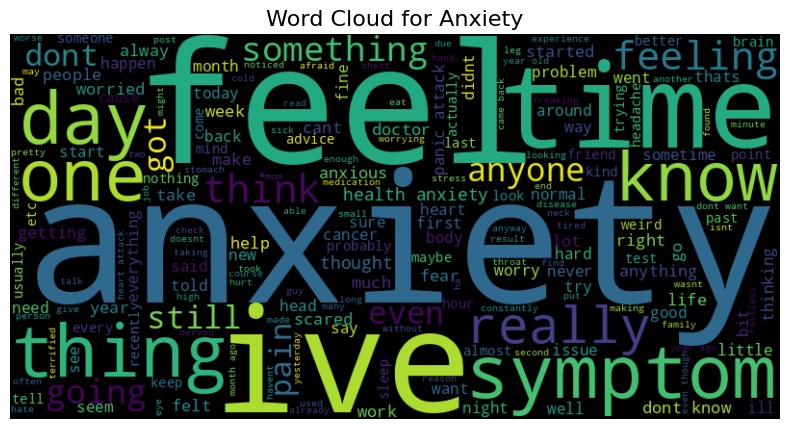

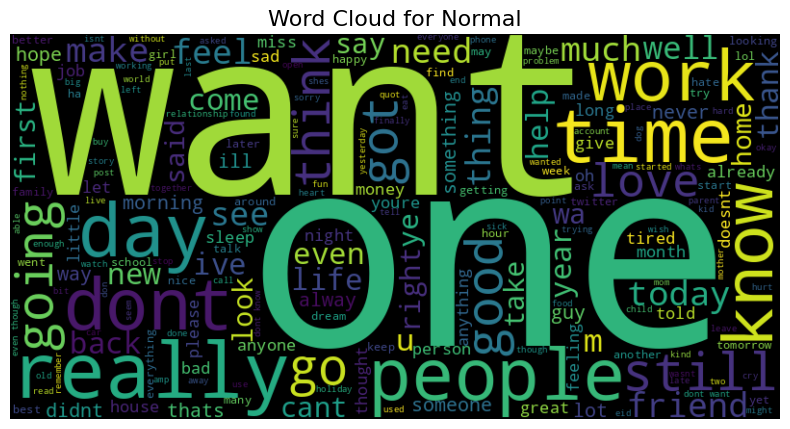

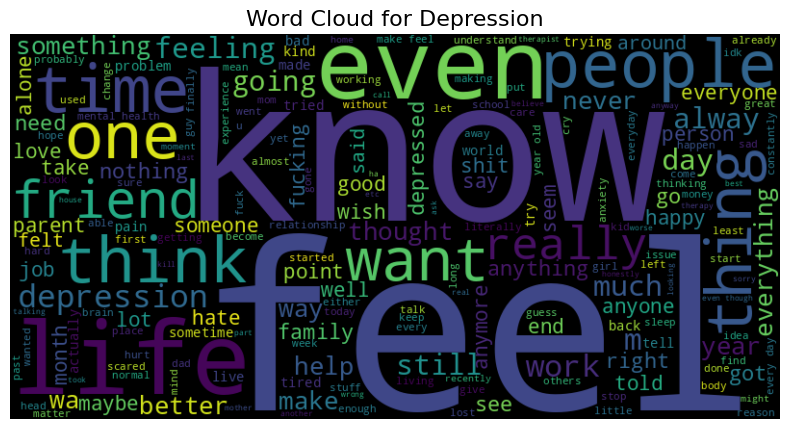

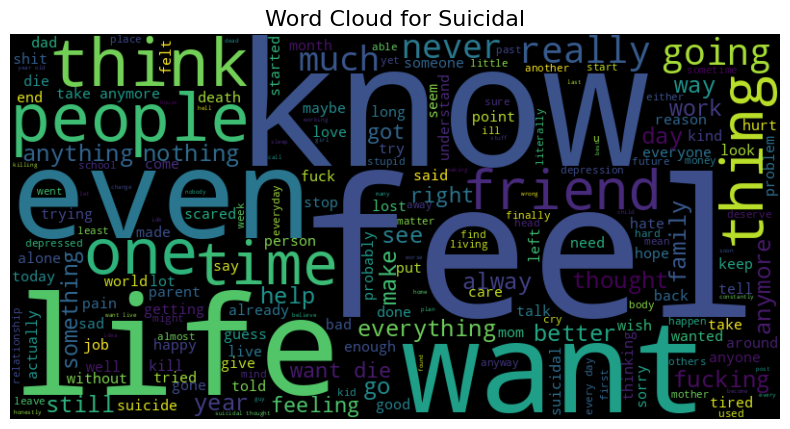

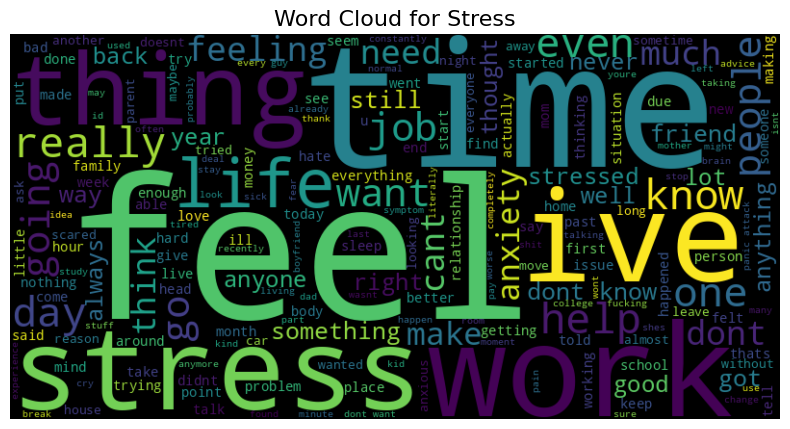

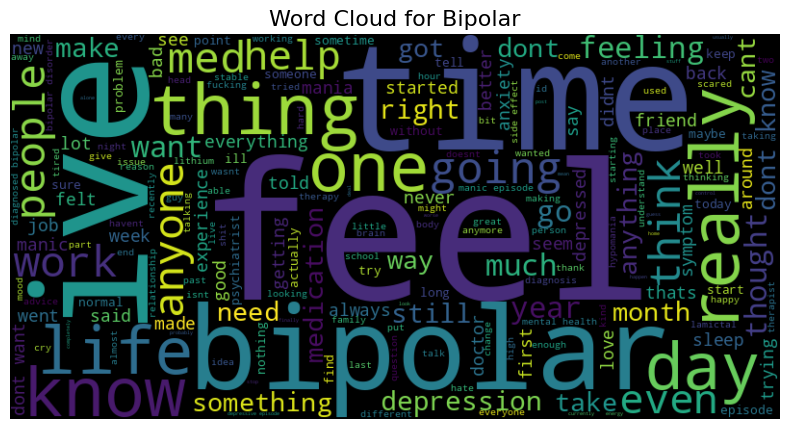

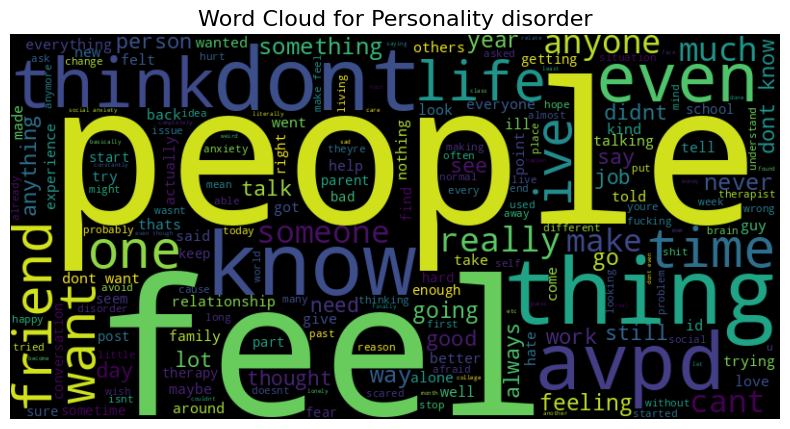

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get unique statuses
statuses = df['status'].unique()

# Generate and display word clouds for each status
for status in statuses:
    # Filter the text data by status
    status_text = ' '.join(df[df['status'] == status]['processed_text'])

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400).generate(status_text)


    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {status}', fontsize=16)
    plt.axis('off')
    plt.show()


In [54]:
vectorizer.fit(x_train)
print(f'vectorizer fitted.')
print('No. of feature_words: ', len(vectorizer.get_feature_names_out()))

vectorizer fitted.
No. of feature_words:  500000


In [ ]:
# Model Training with Hyperparameter Tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]
}

model = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_tfidf, y_train)

# Best Model
best_model = grid_search.best_estimator_